In [1]:
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def splitting_ratio_insertion_loss(sparam):
        # num_simulation: number of simulations
        # return: insertion_loss, splitting_ratio
        num_simulation = 5
        insertion_loss = []
        splitting_ratio = []
        for x in range(num_simulation):     
            #print(sparam['S21'][x])
            T2_temp = abs(sparam['S21'][x])*abs(sparam['S21'][x])
            T3_temp = abs(sparam['S31'][x])*abs(sparam['S31'][x])
            insertion_loss.append([2.99792458e8/sparam['f'][x][0],10*math.log10(T3_temp+T2_temp)])
            splitting_ratio.append([2.99792458e8/sparam['f'][x][0],-10*math.log10(max(T2_temp,T3_temp)/min(T2_temp,T3_temp))])

            data_1 = {"insertion loss":[], "splitting ratio":[]}
            data_1.update({"insertion loss": insertion_loss, "splitting ratio": splitting_ratio})

            # output: {'insertion loss': [[wavelength,...], [wavelength,...]...], 'splitting ratio':[[wavelength,...], [wavelength,...]...]}
        return data_1

In [11]:
print(arr[0]['f'])

[[1.87370286e+14]
 [1.94062082e+14]
 [2.00753878e+14]
 [2.07445674e+14]
 [2.14137470e+14]]


In [47]:
print(2.99792458e8/arr[0]['f'])

[[1.60000000e-06]
 [1.54482759e-06]
 [1.49333333e-06]
 [1.44516129e-06]
 [1.40000000e-06]]


In [3]:
arr = []
for i in range(10):
    with open(f"mesh{i+1}margin1.pk1", "rb") as file:
        arr.append(pickle.load(file))

#print(arr)
IL_SR_all = []
for i in range(10):
    IL_SR_all.append(splitting_ratio_insertion_loss(arr[i]))

In [49]:
print(out)

{'insertion loss': [[1.6e-06, -24.741620839310897], [1.5448275862068966e-06, -25.363232751448205], [1.4933333333333334e-06, -25.521101566107376], [1.4451612903225806e-06, -25.278266083430005], [1.4e-06, -25.072900366573595]], 'splitting ratio': [[1.6e-06, -0.00014033295982609912], [1.5448275862068966e-06, -0.00017218023657953674], [1.4933333333333334e-06, -0.00015098105652656434], [1.4451612903225806e-06, -8.294628773800251e-05], [1.4e-06, -0.0003344343258056688]]}


In [4]:
center_wavelength = None
start_bandwidth = None
stop_bandwidth = None
mean_IL = None
mean_sr = None
IL_center = None
SR_center = None

In [5]:
#Not sure how MEAN IL function works

In [13]:
# find center wavelength
def findMeanIR(IL_SR):
    center_wavelength = None
    start_bandwidth = None
    stop_bandwidth = None
    mean_IL = None
    mean_sr = None
    IL_center = None
    SR_center = None
    
    temp = 1 / ( 2 * (IL_SR['insertion loss'][0][1]+IL_SR['splitting ratio'][0][1] ) )
    print(temp)
    # print(temp)
    for i in range(5):
        if (  temp <= (1 / ( 2 * (IL_SR['insertion loss'][i][1]+IL_SR['splitting ratio'][i][1] ) ))   ):
            center_wavelength = IL_SR['insertion loss'][i][0]
            IL_center = IL_SR['insertion loss'][i][1]
            SR_center = IL_SR['splitting ratio'][i][1]
            temp = 1 / ( 2 * (IL_SR['insertion loss'][i][1]+IL_SR['splitting ratio'][i][1] ) )

    # find bandwidth
    for i in range(5):
        print(IL_SR['insertion loss'][i][1])
        if (IL_SR['insertion loss'][i][1]>-0.5 and IL_SR['splitting ratio'][i][1]>-0.25):
            if (stop_bandwidth is None):
                stop_bandwidth = IL_SR['insertion loss'][i][0]
            start_bandwidth = IL_SR['insertion loss'][i][0]
            #print(start_bandwidth)

    # find mean IL & mean SR

    data_subset_IL = []
    data_subset_SR = []
    if (start_bandwidth is None or stop_bandwidth is None):
        mean_IL = None
        mean_sr = None
    else: 
        for i in range(5):
            if (IL_SR['insertion loss'][i][0] <= stop_bandwidth and IL_SR['insertion loss'][i][0] >= start_bandwidth ):
                data_subset_IL.append(IL_SR['insertion loss'][i][1])
                data_subset_SR.append(IL_SR['splitting ratio'][i][1])
        mean_IL = sum(data_subset_IL)/len(data_subset_IL)
        mean_SR = sum(data_subset_SR)/len(data_subset_SR)    
        
    return mean_IL

In [14]:
means = []
for i in range(10):
    means.append(findMeanIR(IL_SR_all[i]))

0.8896832587706187
0.5630963160500704
1.6e-06
0.6279963177727306
1.5448275862068966e-06
0.6543531630266125
1.4933333333333334e-06
0.6118088792555969
1.4451612903225806e-06
0.5064096492134238
1.4e-06
0.5113367313048917
0.9778936565833161
1.6e-06
0.9930334408571556
1.5448275862068966e-06
0.9197801639318226
1.4933333333333334e-06
0.7667922963230234
1.4451612903225806e-06
0.5415278920393719
1.4e-06
0.49093706816845784
1.0186487891064269
1.6e-06
1.0164498903017012
1.5448275862068966e-06
0.9105563655117357
1.4933333333333334e-06
0.705629986929158
1.4451612903225806e-06
0.41607586429449983
1.4e-06
0.6761044261100905
0.7400064650031956
1.6e-06
0.7304619234895078
1.5448275862068966e-06
0.620458296468543
1.4933333333333334e-06
0.4174041117386531
1.4451612903225806e-06
0.1512527960971762
1.4e-06
0.5905643323459594
0.8470839605691538
1.6e-06
0.8276828310761798
1.5448275862068966e-06
0.7072823785206371
1.4933333333333334e-06
0.49190299669747406
1.4451612903225806e-06
0.21298619137635538
1.4e-06
0.5

In [15]:
print(means)

[0.5927328650636868, 0.8398054899469379, 0.8134721792287044, 0.5319167185594151, 0.61738767164796, 0.6568907074424288, 0.6945376132801103, 0.5758754480400694, 0.5758754480400694, 0.5758754480400694]


[1.6e-06, 1.5448275862068966e-06, 1.4933333333333334e-06, 1.4451612903225806e-06, 1.4e-06]


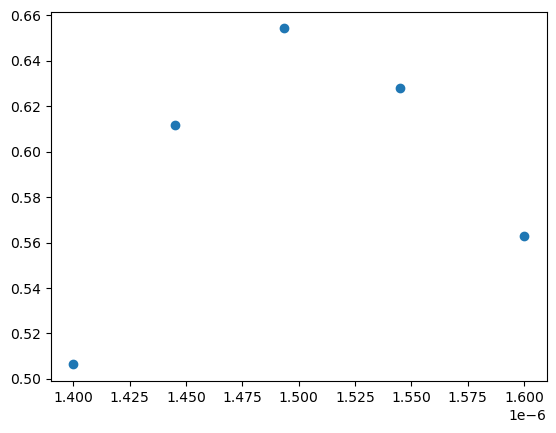

In [16]:
Ysup = []

X = [a[0] for a in IL_SR_all[0]['insertion loss']]
print(X)
for i in range(10):
    Ysup.append([a[1] for a in IL_SR_all[i]['insertion loss']])
#print(X)
plt.scatter(X,Ysup[0])
plt.show()

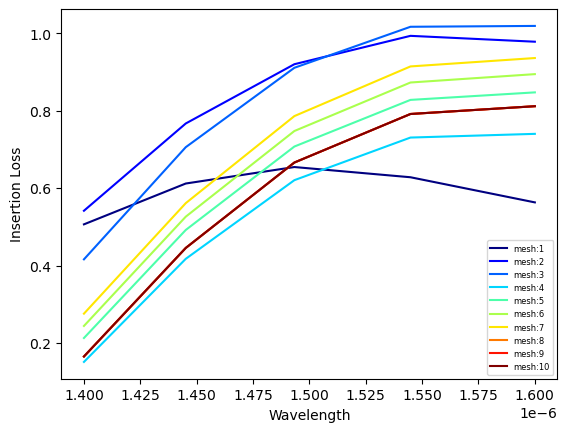

In [17]:
for i, val in enumerate(cm.jet(np.linspace(0,1,10))): #different lines
    plt.plot(X, Ysup[i], label=f"mesh:{i+1}", color=val)
plt.legend(loc="lower right",prop={'size': 6})
plt.xlabel("Wavelength")
plt.ylabel("Insertion Loss")
plt.show()

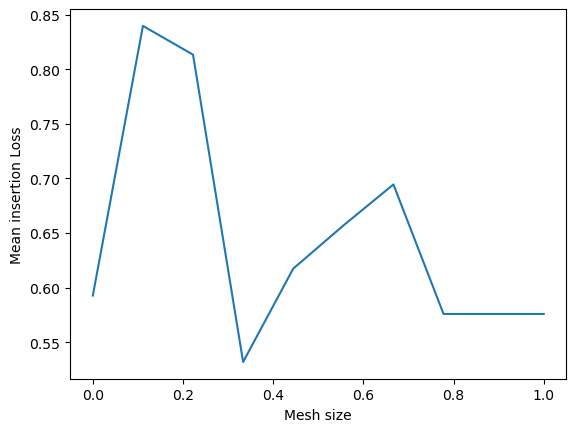

In [20]:
plt.plot(np.linspace(0,1,10), means)
plt.xlabel("Mesh size")
plt.ylabel("Mean insertion Loss")
plt.show()